## 3.2.2 Linear regression



###  Create model, compute loss, and optimize the parameters  

1. 所有的层结构和损失函数，都来自torch.nn；因此，所有的模型构建都是从nn.Module继承的。  
2. torch.optim，通过修改参数，使得loss function最小化。  
    一阶优化算法：  
    $$\theta = \theta - \eta * \frac {\partial J(\theta)}{\partial \theta}$$  
    $\eta $ is learning rate. $\frac {\partial J(\theta)}{\partial \theta}$ is the gradient of the function J.  
   We can use torch.optim:   
   e.g optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)   
3. torch.save 
    1. save the constructure of the model and parameters---save model.  
      torch.save(model, './model.pth')
    
    2. save the states of the model.  
      torch.save(model.state_dict(), './model_state.pth'  

4. torch.load
    1. load the constructure of the model and parameters.   
         load_model = torch.load('model.pth')
     
    2. load the states of the model.   
         load_model = model.load_state_dic(torch.load('model_state.pth')
    
 

$$ f(x) = wx + b $$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
x = np.array([[2.3],[3.3],[4.4],[5.5],[6.7],[3.1]], dtype=np.float32)
y = np.array([[0.9],[1.7],[2.76],[2.09],[3.19],[1.3]], dtype=np.float32)

# convert numpy to tensor
x = torch.from_numpy(x)
y = torch.from_numpy(y)
print(x)

tensor([[2.3000],
        [3.3000],
        [4.4000],
        [5.5000],
        [6.7000],
        [3.1000]])


In [3]:
import torch.nn as nn

class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.Linear = nn.Linear(1, 1)
        
    def forward(self, x):
        output = self.Linear(x)
        return output

if torch.cuda.is_available():
    model = LinearRegression().cuda()
else:
    model = LinearRegression()

In [4]:
critirion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [5]:
from torch.autograd import Variable

for i in range(500):
    if torch.cuda.is_available():
        inputs = Variable(x).cuda()
        target = Variable(y).cuda()
    else:
        inputs = Variable(x)
        target = Variable(y)
    output = model(inputs)
    loss = critirion(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (i+1)%100 == 0:
        print('loss is {}'.format(loss.data))

loss is 0.16775231063365936
loss is 0.15849757194519043
loss is 0.15746252238750458
loss is 0.15647295117378235
loss is 0.15552526712417603


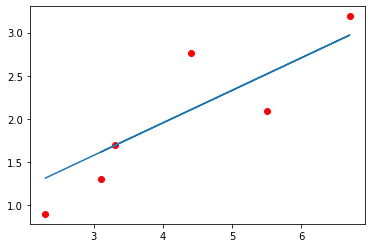

In [6]:
import matplotlib.pyplot as plt

model.eval()

model.cpu()  # Expected object of device type cuda but got device type cpu for argument #2 'mat1' in call to _th_addmm

predict = model(Variable(x))
# 将预测值画出来
predict = predict.data.numpy()
plt.plot(x.numpy(), y.numpy(),'ro', label='original data')
plt.plot(x.numpy(), predict, label='Fitting Line')
plt.show()

numpy.array 转换成Tensor：torch.from_numpy(x_numpy)   
model.cuda(): 将模型放到GPU上    
每次做反向传播之前，都要做归零梯度：optimizer.zero_grad()  
model.eval(): 将模型变成测试模式； 这是因为有一些层操作，比如dropout 和 BatchNormalization 在 __训练__和 __测试__ 时不一样。  
定义的模型是线性的，所以，在这里，模型预测的值，画出来就是一条直线。


### 多项式回归
$$ y = b + w1*x + w2*x^2 + w3*x^3$$
$$ y = 0.9 + 0.5*x + 3*x^2 + 2.4*x^3$$

In [7]:
# define w, b, x
w = torch.FloatTensor([0.5, 3, 2.4]).unsqueeze(1)     ## unsqueeze(1):将原来的tensor大小由3变成（3，1）。
b = torch.FloatTensor([0.9])

def make_features(x):
    x = x.unsqueeze(1)
    return torch.cat([x**i for i in range(1, 4)], 1)

In [8]:
# define model
def f(x):
    return x.mm(w) + b

In [9]:
def get_batch(batch_size=32):
    random = torch.randn(batch_size)
    x = make_features(random)
    y = f(x)
    if torch.cuda.is_available():
        return Variable(x).cuda(), Variable(y).cuda()
    else:
        return Variable(x), Variable(y)

In [10]:
class poly_model(nn.Module):
    def __init__(self):
        super(poly_model, self).__init__()
        self.poly = nn.Linear(3, 1)
    
    def forward(self, x):
        out = self.poly(x)
        return out

In [11]:
## Compare the f(x) and the class poly_model, then compute the loss
# define the model
if torch.cuda.is_available():
    model = poly_model().cuda()
else:
    model = poly_model()

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
epoch = 0 
while True:
    batch_x, batch_y = get_batch()
    out = model(batch_x)
    loss = criterion(out, batch_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    epoch += 1
    if loss < 1e-3 + 0.001:
        print(loss)
    if loss < 1e-3:
        break



tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0016, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0020, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0018, device='cuda:0', grad_fn=<MseLossBackward>)
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward

In [12]:
numpyx = np.arange(-1, 1, 0.25, dtype='float32')  ### here dtype='float32' is important.
x = torch.from_numpy(numpyx)
x = make_features(x)
y = f(x)

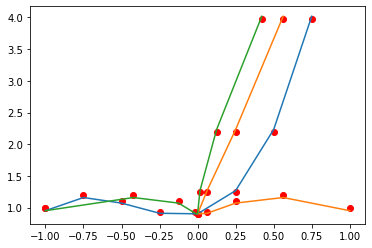

In [13]:
numx = x.numpy()
numy = y.numpy()

model = model.cpu()   # run on cpu!!
predict = model(x)
predict = predict.data.numpy()
plt.plot(numx, numy, 'ro', label='original data')
plt.plot(x, predict, label='fitting')

# 3.3 Classification   
二分类算法- __Logistic回归__   

## 3.3.3 Logistic distribution   
Supposed that X是连续的随机变量，服从Logistic分布是指X的积累分布函数如下：
$$ F(x) = P(X <= x) = \frac{1}{1 + e^{-(x-u)/r}}$$
u 影响中心对称点的位置, r越小，中心点附近的增长速度越快。  

Sigmoid函数，Logistic分布函数中r=1，u=0的形式： 
$$ P(x) = \frac{1}{1 + e^{-x}}$$ 

## 3.3.4 two-class Logistic regression  
对于二分类问题，Logistic回归的目标：希望找到一个区分度好的决策边界。  
假设样本的部分点A：$$ h_{w}(x) = \sum {w_i * x_i + b} > 0$$ 
   另外的样本点B：$$ h_{w}(x) = \sum {w_i * x_i + b} < 0$$ 
   属于A的，可以判定它的类别为1；属于B的，可以判定它的类别是0.  
   $$P(Y=0|x) = \frac{1}{1 + e^{w*x +b}}$$
   $$P(Y=1|x) = \frac{e^{w*x + b}}{1 + e^{w*x +b}}$$
   
### logit function:
$$logit(p) = log(\frac{p}{1-p})$$
$$log(\frac{P(Y=1|x)}{P(Y=0|x)}) = w*x + b  $$
$$log(\frac{P(Y=1|x)}{1- P(Y=1|x)}) = w*x + b $$
在Logistic回归模型中，输出Y=1的对数几率 是 输入x的线性函数。

In [23]:
import os
path = os.getcwd()
path = os.path.join(path, 'data.txt')
path

'/home/local/USHERBROOKE/shih3801/Documents/IFT725/IFT725_myUnderstanding/Pytorch_tutorial/data.txt'

In [24]:
with open(path, 'r') as f:
    datalist = f.readlines()
    data = [i.split('\n')[0] for i in datalist]
    print(data[:4])
    data = [i.split(',') for i in data]
    print(data[:4])
    data = [(float(i[0]), float(i[1]), int(i[2])) for i in data]
    print(data[:4])

['34.62365962451697,78.0246928153624,0', '30.28671076822607,43.89499752400101,0', '35.84740876993872,72.90219802708364,0', '60.18259938620976,86.30855209546826,1']
[['34.62365962451697', '78.0246928153624', '0'], ['30.28671076822607', '43.89499752400101', '0'], ['35.84740876993872', '72.90219802708364', '0'], ['60.18259938620976', '86.30855209546826', '1']]
[(34.62365962451697, 78.0246928153624, 0), (30.28671076822607, 43.89499752400101, 0), (35.84740876993872, 72.90219802708364, 0), (60.18259938620976, 86.30855209546826, 1)]


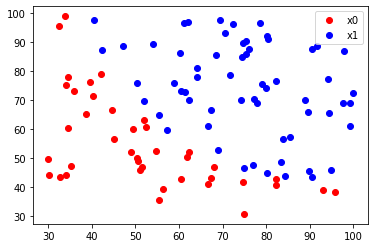

In [25]:
# plot the data
import matplotlib.pyplot as plt
x0 = list(filter(lambda x: x[-1] == 0, data))
x1 = list(filter(lambda x: x[-1] == 1, data))
# Plot the points of x0 in red
x0_a = [i[0] for i in x0]
x0_b = [i[1] for i in x0]
plt.plot(x0_a, x0_b, 'ro', label='x0')
# plot the points of x1 in blue
x1_a = [i[0] for i in x1]
x1_b = [i[1] for i in x1]
plt.plot(x1_a, x1_b, 'bo', label='x1')
plt.legend(loc='best') # set the position of legend and show the labels

### Try to look for the line to separate the two classes. 
### w0* x + w1*y + b = 0. To look for the w, b
## 定义Logistic回归模型，二分类的损失函数 和 优化方法。

In [26]:
# Try to look for the line to separate the two classes. 
# y = w * x + b. To look for the w, b
class Logistic(nn.Module):
    def __init__(self):
        super(Logistic, self).__init__()
        self.Linear = nn.Linear(2, 1)
        self.sm = nn.Sigmoid()
        
    def forward(self, x):
        out = self.Linear(x)
        out = self.sm(out)
        return out
    
model = Logistic()
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)

In [27]:
from torch.autograd import Variable

np_data = np.array(data, dtype='float32') # 转换成 numpy array
x_data = torch.from_numpy(np_data[:, 0:2]) # 转换成 Tensor, 大小是 [100, 2]
y_data = torch.from_numpy(np_data[:, -1]).unsqueeze(1) # 转换成 Tensor，大小是 [100, 1]

for epoch in range(500000):  # while True: loss < 1e-1
  
    x = Variable(x_data)
    y = Variable(y_data)
    
    predict = model(x)
    loss = criterion(predict, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epoch+1)%100000 == 0:
        print(loss)
    

tensor(0.2247, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2104, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2064, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2049, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.2042, grad_fn=<BinaryCrossEntropyBackward>)


In [28]:
np_data[:5]

array([[34.62366 , 78.0247  ,  0.      ],
       [30.28671 , 43.894997,  0.      ],
       [35.84741 , 72.9022  ,  0.      ],
       [60.1826  , 86.308556,  1.      ],
       [79.03274 , 75.344376,  1.      ]], dtype=float32)

## get the parameters of the model
### model.linear.weight[0]


In [29]:
w0, w1 = model.Linear.weight[0]
w0 = w0.data
w1 = w1.data
b = model.Linear.bias.data[0]  ## tensor(11.7589) tensor([-11.7589])
print(w0, w1, b)

tensor(0.1900) tensor(0.1850) tensor(-23.1273)


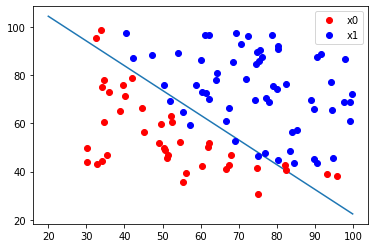

In [30]:
plotx = np.arange(20, 100, 0.1)
ploty = (-w0*plotx - b) / w1
plt.plot(plotx, ploty)
x0 = list(filter(lambda x: x[-1] == 0, data))
x1 = list(filter(lambda x: x[-1] == 1, data))
# Plot the points of x0 in red
x0_a = [i[0] for i in x0]
x0_b = [i[1] for i in x0]
plt.plot(x0_a, x0_b, 'ro', label='x0')
# plot the points of x1 in blue
x1_a = [i[0] for i in x1]
x1_b = [i[1] for i in x1]
plt.plot(x1_a, x1_b, 'bo', label='x1')
plt.legend(loc='best') 